In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

In [2]:
def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogeneas
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)


In [3]:
def scale(vertex, sx, sy):
    M = np.array([[sx,0,0], [0,sy,1], [0,0,1]]) # Pass a single list of lists as the argument to np.array()
    res = M @ vertex.T # Use .T for transpose
    return res.T # Use .T for transpose

In [4]:

def rotate(vertex, a):
   pass

In [45]:
def translate(vertex, dx, dy, a):
    M = np.array([[1,0,dx], [0,1,dy], [0,0,1]]) # Pass a single list of lists as the argument to np.array()
    res = M @ vertex.T
    return res.T

In [50]:
def compuesta(vertex, dx, dy, sx, sy):
    M = np.array([[sx*np.cos(a),np.sin(a),dx], [np.sin(a),sy*1,dy], [0,0,1]]) # Removed np and replaced it with 1 assuming you wanted to perform scalar multiplication
    res = M @ vertex.T
    return res.T

In [48]:
# image size
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

In [49]:
# Parametros de las transformaciones
# Traslada a centro y realiza escala y rotacion
a = 0.5
s = 3
t = 250

In [51]:
# Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])

In [53]:
triangle_compost = compuesta(triangle1, t, t, s,s)

In [56]:
draw_triangle(im, triangle1)
draw_triangle(im, triangle_compost, color= (0,100,255))

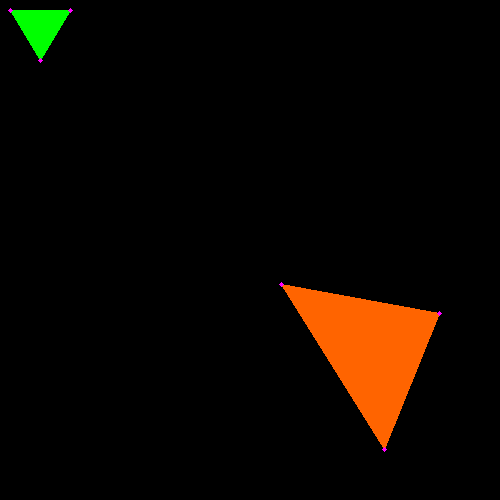

In [57]:
cv2_imshow(im)